### Bayesian inference with beta distribution

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from  scipy.stats import beta

In [6]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.alpha = 1
        self.beta = 1
        self.N = 0 # Only for analyzig
        
    def roll(self):
        if random.random() < self.p:
            return 1
        else:
            return 0
        
    def sample(self):
        return np.random.beta(self.alpha, self.beta)
        
    def update(self, x):
        self.alpha += x
        self.beta += (1 - x)
        self.N += 1

In [22]:
class BanditsOptymalizer:
    def __init__(self, bandits: list[Bandit]):
        self.bandits = bandits
        
    def step(self):
        bandit = max(self.bandits, key=lambda bandit: bandit.sample())
        result = bandit.roll()
        bandit.update(result)
    
    def plot(self,iteration):
        x = np.linspace(0, 1, 100)
        
        plt.figure(figsize=(8, 6))
        for bandit in self.bandits:
            y = beta.pdf(x, bandit.alpha, bandit.beta)
            plt.plot(x, y, label=f'p={bandit.p} [{bandit.alpha-1}/{bandit.N}]')
            
        plt.xlabel('Mean of Bandit')
        plt.ylabel('Probability Density')
        plt.title(f'Iteration {iteration}')
        plt.legend()
        plt.grid(True)    

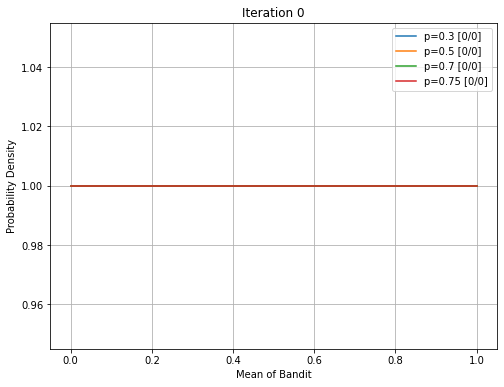

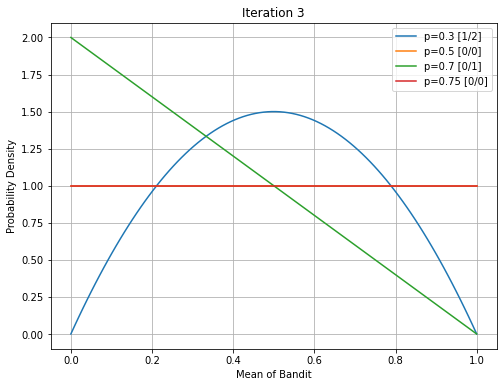

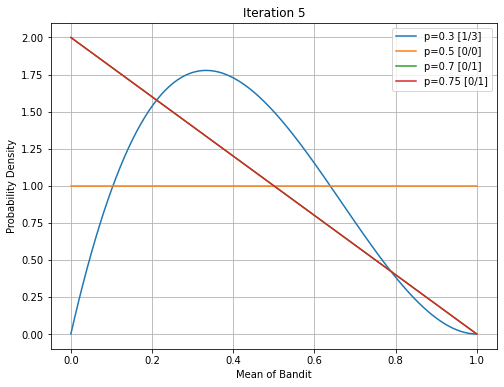

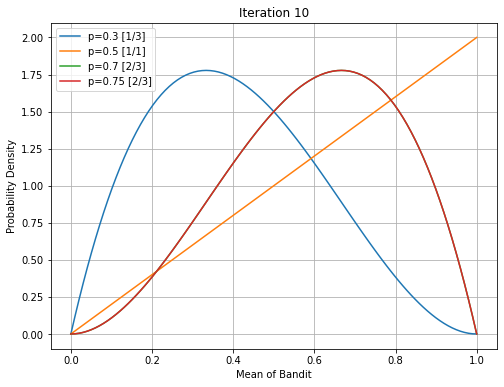

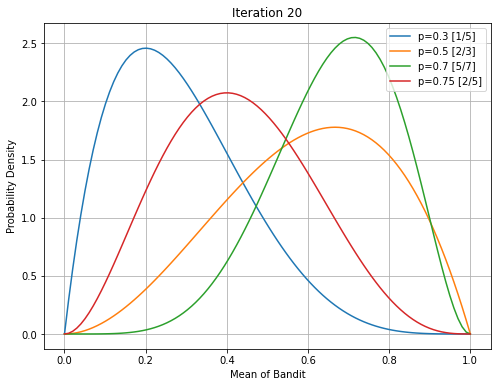

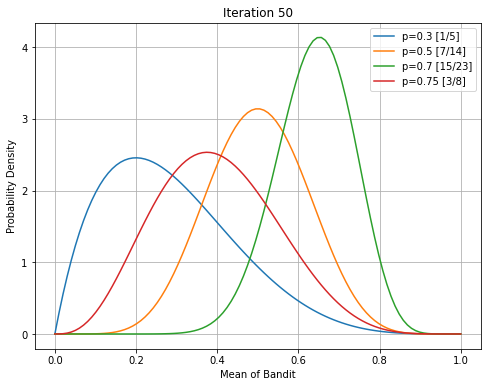

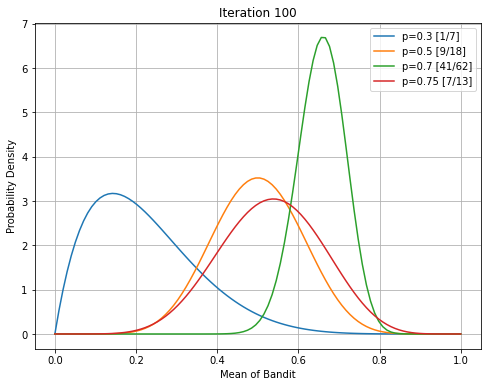

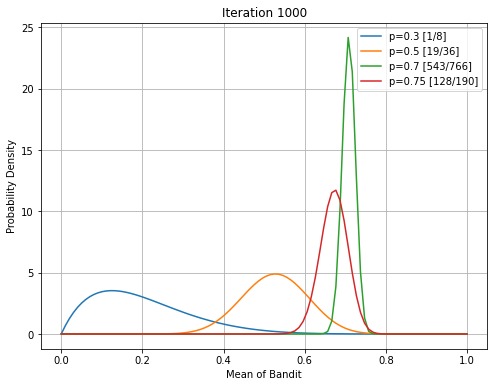

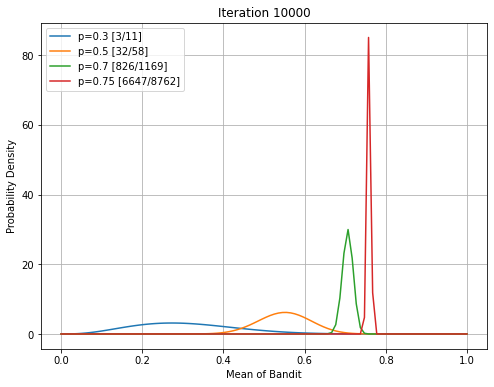

In [34]:
bandits = [Bandit(0.3), Bandit(0.5), Bandit(0.7), Bandit(0.75)]
opt = BanditsOptymalizer(bandits)
plots_iter  = [0, 3, 5, 10, 20, 50, 100, 1000, 10000]
for i in range(10001):
    if i in plots_iter:
        opt.plot(i)
    opt.step()
